In [23]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [24]:
breasts = datasets.load_breast_cancer(as_frame=True)
data = breasts.data
target = breasts.target

In [25]:
df_data = pd.DataFrame(data = data, columns = breasts.feature_names)
display(df_data)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
data_train, data_test, target_train, target_test = train_test_split(data,target,test_size=0.33,random_state=42)

In [33]:
print("Dimensions de l'ensemble d'entrainement (partie data) : ", data_train.shape)
print("Dimensions de l'ensemble de test (partie data) : ", data_test.shape)

print("Dimensions de l'ensemble d'entrainement (partie target) : ", target_train.shape)
print("Dimensions de l'ensemble de test (partie target) : ", target_test.shape)

Dimensions de l'ensemble d'entrainement (partie data) :  (381, 30)
Dimensions de l'ensemble de test (partie data) :  (188, 30)
Dimensions de l'ensemble d'entrainement (partie target) :  (381,)
Dimensions de l'ensemble de test (partie target) :  (188,)


In [41]:
from sklearn import tree

In [42]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes = 2)

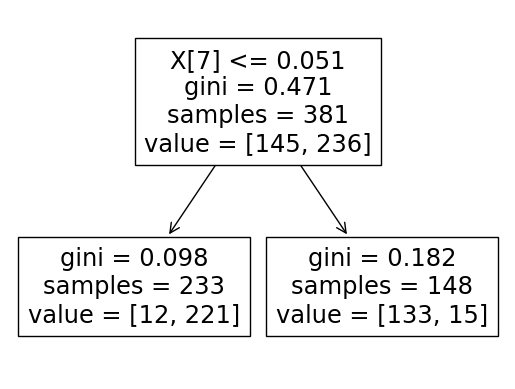

In [44]:
clf.fit(data_train, target_train)
tree.plot_tree(clf)
plt.show()

In [54]:
pred_data = clf.predict(data_train)
pred_test = clf.predict(data_test)

In [45]:
from sklearn.metrics import accuracy_score

In [55]:
acc_data = accuracy_score(pred_data, target_train)
acc_test = accuracy_score(pred_test, target_test)
print("data accuracy: ", acc_data)
print("test accuracy: ", acc_test)

data accuracy:  0.9291338582677166
test accuracy:  0.8882978723404256


In [61]:
clf2 = tree.DecisionTreeClassifier(max_leaf_nodes = 10)

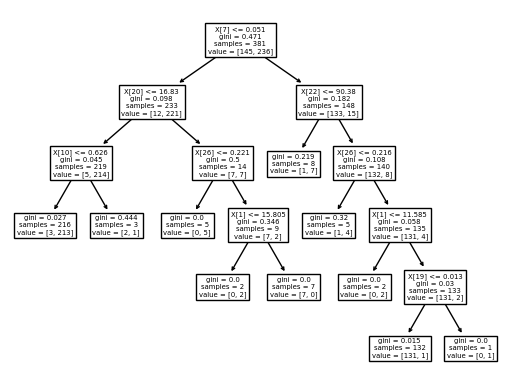

In [62]:
clf2.fit(data_train, target_train)
tree.plot_tree(clf2)
plt.show()

In [63]:
pred_data2 = clf2.predict(data_train)
pred_test2 = clf2.predict(data_test)
acc_data2 = accuracy_score(pred_data2, target_train)
acc_test2 = accuracy_score(pred_test2, target_test)
print("data accuracy: ", acc_data2)
print("test accuracy: ", acc_test2)

data accuracy:  0.9816272965879265
test accuracy:  0.9308510638297872


In [67]:
def accuracies(max_leaf):
    clf = tree.DecisionTreeClassifier(max_leaf_nodes = max_leaf)
    clf.fit(data_train, target_train)
    pred_data = clf.predict(data_train)
    pred_test = clf.predict(data_test)
    return [accuracy_score(pred_data, target_train), accuracy_score(pred_test, target_test)]
    

In [71]:
res = [(x, accuracies(x)) for x in range(2,31)]
res

[(2, [0.9291338582677166, 0.8882978723404256]),
 (3, [0.9448818897637795, 0.898936170212766]),
 (4, [0.9448818897637795, 0.925531914893617]),
 (5, [0.952755905511811, 0.9521276595744681]),
 (6, [0.9658792650918635, 0.9574468085106383]),
 (7, [0.9711286089238845, 0.9521276595744681]),
 (8, [0.9763779527559056, 0.9468085106382979]),
 (9, [0.979002624671916, 0.9414893617021277]),
 (10, [0.9816272965879265, 0.9414893617021277]),
 (11, [0.984251968503937, 0.9468085106382979]),
 (12, [0.9868766404199475, 0.9148936170212766]),
 (13, [0.989501312335958, 0.9361702127659575]),
 (14, [0.9921259842519685, 0.9414893617021277]),
 (15, [0.9921259842519685, 0.9468085106382979]),
 (16, [0.994750656167979, 0.9414893617021277]),
 (17, [0.994750656167979, 0.9468085106382979]),
 (18, [0.9973753280839895, 0.9202127659574468]),
 (19, [0.9973753280839895, 0.9308510638297872]),
 (20, [1.0, 0.898936170212766]),
 (21, [1.0, 0.9148936170212766]),
 (22, [1.0, 0.925531914893617]),
 (23, [1.0, 0.9042553191489362]),
